# Importing moduls

In [1]:
with __import__('importnb').Notebook(): 
    from helper2 import *

In [2]:
from helper import *

# Filtering

## Cheby1

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import fftconvolve

In [14]:
def Cheby1Filter(freq, n, rs, cutoff_freq):
    # частоты, порядок фильтра, minimum attenuation in -dB, cutoff frequency
    eps = np.sqrt(10**(0.1*rs) - 1) #расчитываем eps из minimum attenuation in -dB
    c = np.append(np.zeros(n), eps)
    freq = np.asarray(freq, dtype = complex)
    cheby2_filter = 1/np.sqrt(1 + (np.polynomial.chebyshev.chebval(freq/cutoff_freq, c)**2))
    return(cheby2_filter)


def SignalProcessingWithCheby1(signal, time, n = 2, rs = 0.3, cutoff_freq = 1):
    fsignal = np.fft.rfft(np.real(signal)) # F[signal]
    freq = np.fft.rfftfreq(time.size, time[1] - time[0]) # преход в частотную область
    fsignal_processed = fsignal * Cheby1Filter(freq, n, rs, cutoff_freq)
    signal_processed = np.fft.irfft(fsignal_processed)
    return(signal_processed)

def SignalProcessingWithCheby1_withoutFsignal(signal, time, n = 2, rs = 0.3, cutoff_freq = 1):
    freq = np.fft.rfftfreq(time.size, time[1] - time[0]) # преход в частотную область
    fcheby1 = np.fft.irfft(Cheby1Filter(freq, n, rs, cutoff_freq))
    signal_processed = fftconvolve(signal, fcheby1, 'same')
    return(signal_processed)

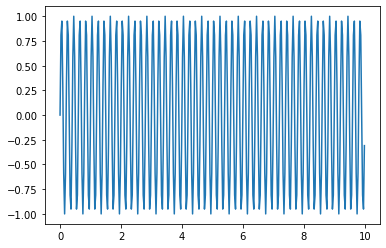

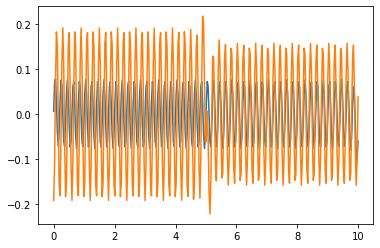

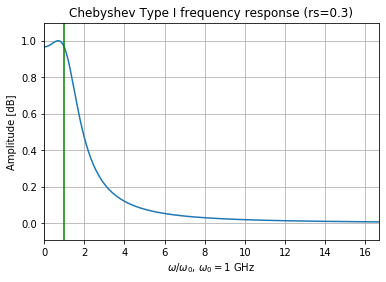

4.990019960079841 0.076399765153071


In [78]:
time = np.arange(0, 10, 0.03)
signal = np.sin(2 * np.pi * 5 * time)

plt.plot(time, signal)
plt.show()

plt.plot(time, SignalProcessingWithCheby1(signal, time))
plt.plot(time, SignalProcessingWithCheby1_withoutFsignal(signal, time))

plt.show()

freq = np.fft.rfftfreq(time.size, time[1] - time[0])
arr = Cheby1Filter(freq, n = 2, rs = 0.3, cutoff_freq = 1)

#plt.semilogx(freq, 20 * np.log10(abs(arr)))
plt.plot(freq, abs(arr))
plt.title('Chebyshev Type I frequency response (rs=0.3)')
plt.xlabel('$\omega / \omega_0$, $\omega_0 = 1$ GHz')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(1, color='green') # cutoff frequency
#plt.axhline(-0.3, color='green') # rs
plt.show()

print(freq[50], abs(arr[50]))

## Example form scipy

/Users/ilyasimakov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


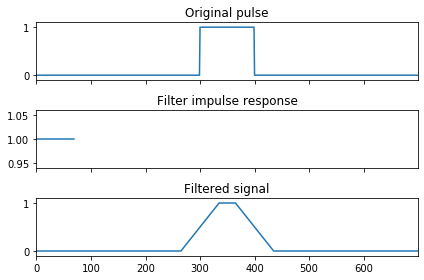

In [41]:
from scipy import signal
sig = np.repeat([0.,0.,0., 1., 0., 0.,0.], 100)
#win = signal.hann(50)
win = np.repeat([1.], 70)
filtered = signal.convolve(sig, win, mode='same') / sum(win)

fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.set_title('Original pulse')
ax_orig.margins(0, 0.1)
ax_win.plot(win)
ax_win.set_title('Filter impulse response')
ax_win.margins(0, 0.1)
ax_filt.plot(filtered)
ax_filt.set_title('Filtered signal')
ax_filt.margins(0, 0.1)
fig.tight_layout()
fig.show()

/Users/ilyasimakov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


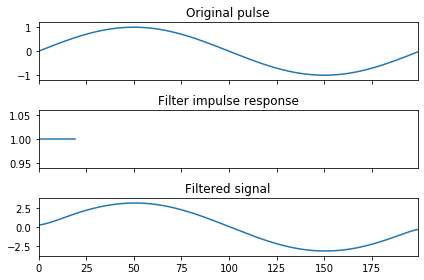

In [69]:
from scipy import signal
time = np.arange(0, 0.2, 0.001)
sig = np.sin(2 * np.pi * 5 * time)
#win = signal.hann(50)
win = np.repeat([1.], sig.size/10)
filtered = signal.convolve(sig, win, mode='same') /(2*np.pi) #/ sum(win)

fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.set_title('Original pulse')
ax_orig.margins(0, 0.1)
ax_win.plot(win)
ax_win.set_title('Filter impulse response')
ax_win.margins(0, 0.1)
ax_filt.plot(filtered)
ax_filt.set_title('Filtered signal')
ax_filt.margins(0, 0.1)
fig.tight_layout()
fig.show()